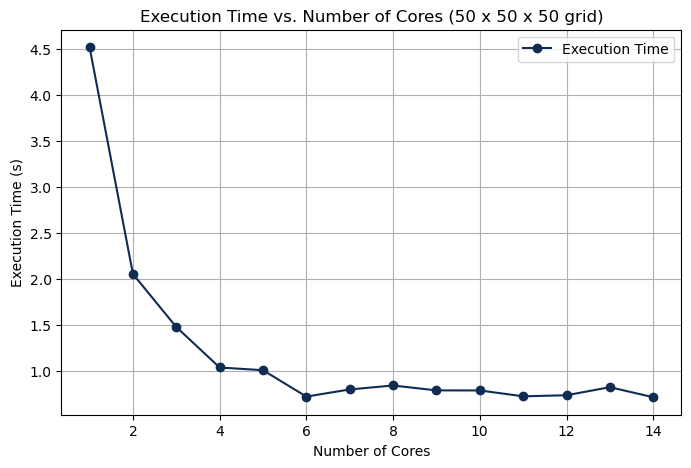

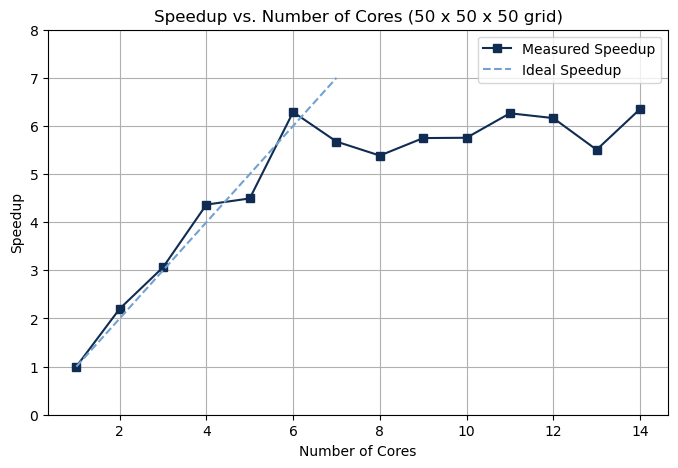

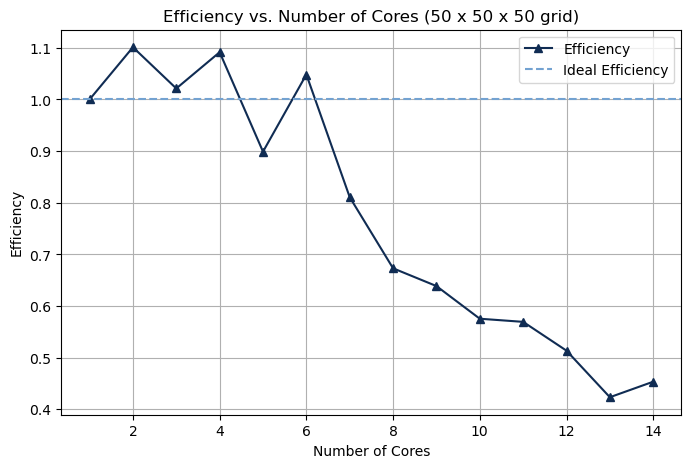

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Recreated data from the image
cores = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
execution_times = np.array([
    4.52154, 2.05317, 1.47584, 1.03565, 1.00601, 0.718886,
    0.796677, 0.839686, 0.78654, 0.785686, 0.721863, 0.733553,
    0.821222, 0.712032
])

# Calculate Speedup
T1 = execution_times[0]  # Time on 1 core
speedup = T1 / execution_times

# Calculate Efficiency
efficiency = speedup / cores

# Plot Execution Time vs. Number of Cores
plt.figure(figsize=(8, 5))
plt.plot(cores, execution_times, marker='o', linestyle='-', color='#102C53', label='Execution Time')
plt.xlabel('Number of Cores')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Number of Cores (50 x 50 x 50 grid)')
plt.grid(True)
plt.legend()
plt.show()

# Compute Theoretical Speedup Using the Given Formula
s = 0.075  # Serial fraction (adjustable parameter)
p = 0.925  # Parallel efficiency factor (adjustable parameter)

def theoretical_speedup(N, s, p):
    return 1 / (s + p / N)

theoretical_speedup_curve = np.array([theoretical_speedup(N, s, p) for N in cores])

# Plot Speedup vs. Number of Cores (Only)
plt.figure(figsize=(8, 5))
plt.plot(cores, speedup, marker='s', linestyle='-', color='#102C53', label='Measured Speedup')
plt.plot(cores[0:7], cores[0:7], linestyle='--', color='#73A2D1', label='Ideal Speedup')  # Ideal linear speedup
plt.ylim(0, 8)
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Cores (50 x 50 x 50 grid)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Efficiency vs. Number of Cores
plt.figure(figsize=(8, 5))
plt.plot(cores, efficiency, marker='^', linestyle='-', color='#102C53', label='Efficiency')
plt.axhline(y=1, color='#73A2D1', linestyle='--', label='Ideal Efficiency')  # 100% efficiency line
plt.xlabel('Number of Cores')
plt.ylabel('Efficiency')
plt.title('Efficiency vs. Number of Cores (50 x 50 x 50 grid)')
plt.grid(True)
plt.legend()
plt.show()
